In [1]:
import numpy as np 
import os
import matplotlib.pyplot as plt

In [10]:
%matplotlib ipympl 

In [11]:
path = "/users/mseth/holography_data/npz_files"

npz_files = []
for (root, dirs, file) in os.walk(path):
    for f in file: 
        npz_files.append(os.path.join(root, f))

xx_list = []
yy_list = []
for file in npz_files:
    data = np.load(file)
    xx = data['XX']
    yy = data['YY']
    xx_list.append(xx)
    yy_list.append(yy)

xx = np.vstack(xx_list)
yy = np.vstack(yy_list)

print(xx.shape)
print(yy.shape)

(1024, 2160)
(1024, 2160)


In [3]:
freqs = np.linspace(400.390625, 800, 1024)

data_one = np.load(npz_files[0])
has = data_one['HA']

In [9]:
has

array([-105.      , -104.90278 , -104.80556 , ...,  104.708336,
        104.80556 ,  104.90278 ], dtype=float32)

/tmp/ipykernel_96478/3790170279.py:19: RuntimeWarning: divide by zero encountered in log10
  pcm_xx = ax['A'].pcolormesh(has, freqs, np.log10(xx_norm))
/tmp/ipykernel_96478/3790170279.py:24: RuntimeWarning: divide by zero encountered in log10
  pcm_yy = ax['B'].pcolormesh(has, freqs, np.log10(yy_norm))


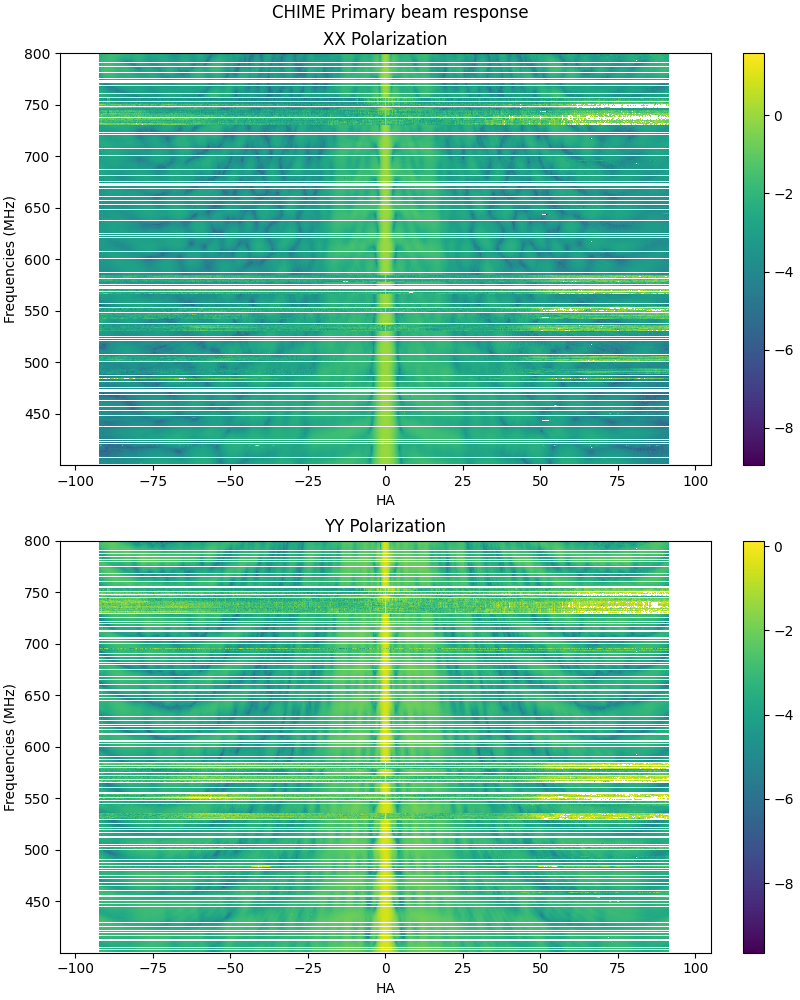

In [14]:
fig, ax = plt.subplot_mosaic(
    '''
    AA
    BB
    ''',
    figsize = (8,10),
    layout = 'constrained')

xx_masked =  xx[:,1040:1120]
xx_max = np.max(xx_masked)
#xx[xx>xx_max]=np.nan
xx_norm = xx / xx_max

yy_masked = yy[:,1040:1120]
yy_max = np.max(yy_masked)
yy_norm = yy / yy_max


pcm_xx = ax['A'].pcolormesh(has, freqs, np.log10(xx_norm))
ax['A'].set_ylabel('Frequencies (MHz)')
ax['A'].set_xlabel('HA')
ax['A'].set_title('XX Polarization')

pcm_yy = ax['B'].pcolormesh(has, freqs, np.log10(yy_norm))
ax['B'].set_ylabel('Frequencies (MHz)')
ax['B'].set_xlabel('HA')
ax['B'].set_title('YY Polarization')

fig.colorbar(pcm_xx, ax=ax['A'])
fig.colorbar(pcm_yy, ax=ax['B'])
plt.suptitle('CHIME Primary beam response')

plt.show()

/tmp/ipykernel_96478/1576456884.py:14: RuntimeWarning: divide by zero encountered in log10
  pcm = ax['A'].pcolormesh(has, freqs, np.log10(intensity_norm))


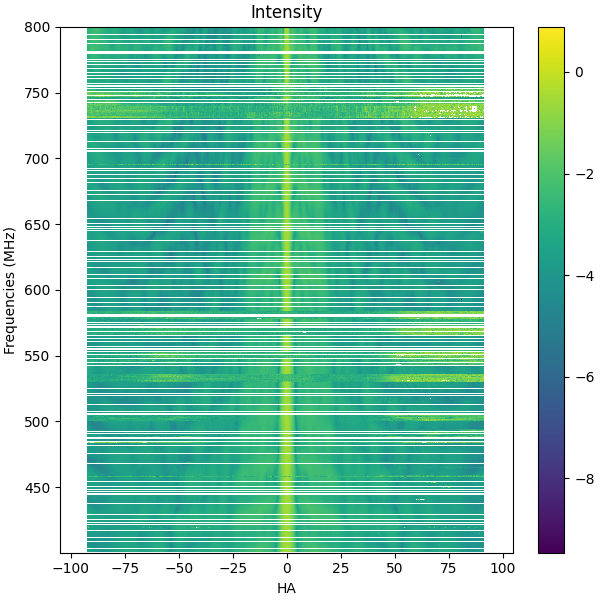

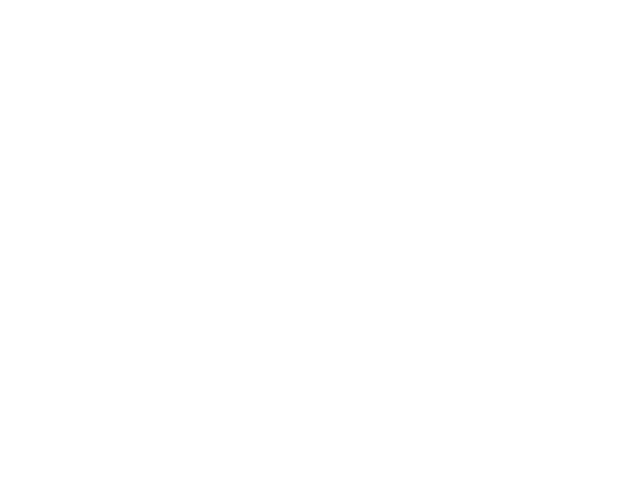

In [13]:
plt.figure()
fig, ax = plt.subplot_mosaic(
    '''
    AA
    ''',
    figsize = (6,6),
    layout = 'constrained')

intensity = xx + yy / 2
intensity_masked = intensity[:,1760:1840]
intensity_max = np.max(intensity_masked)
intensity_norm = intensity / intensity_max

pcm = ax['A'].pcolormesh(has, freqs, np.log10(intensity_norm))
ax['A'].set_ylabel('Frequencies (MHz)')
ax['A'].set_xlabel('HA')
ax['A'].set_title('Intensity')

fig.colorbar(pcm, ax=ax['A'])

plt.show()